<a href="https://colab.research.google.com/github/muhammadhafiz27/Heart-Disease-Predictions/blob/main/Tugas_Praktikum_5_Big_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library dan Load Dataset**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/muhammadhafiz27/Heart-Disease-Predictions/refs/heads/main/heart_clean.csv")
display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Distribusi Numerik**

## **Visualisasi untuk age**

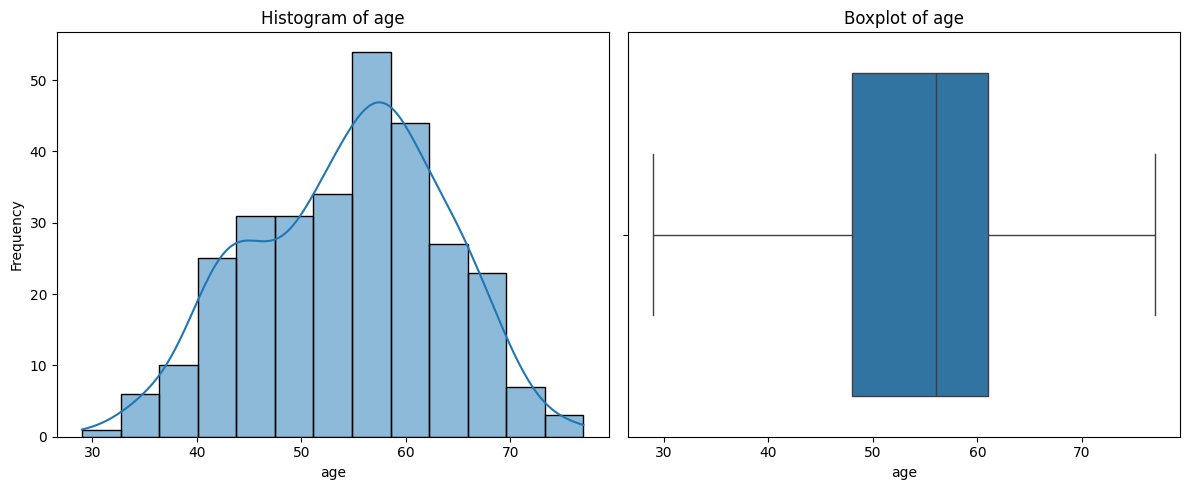

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of age')
axes[0].set_xlabel('age')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['age'], ax=axes[1])
axes[1].set_title('Boxplot of age')
axes[1].set_xlabel('age')

plt.tight_layout()
plt.show()

## **Visualisasi untuk chol**

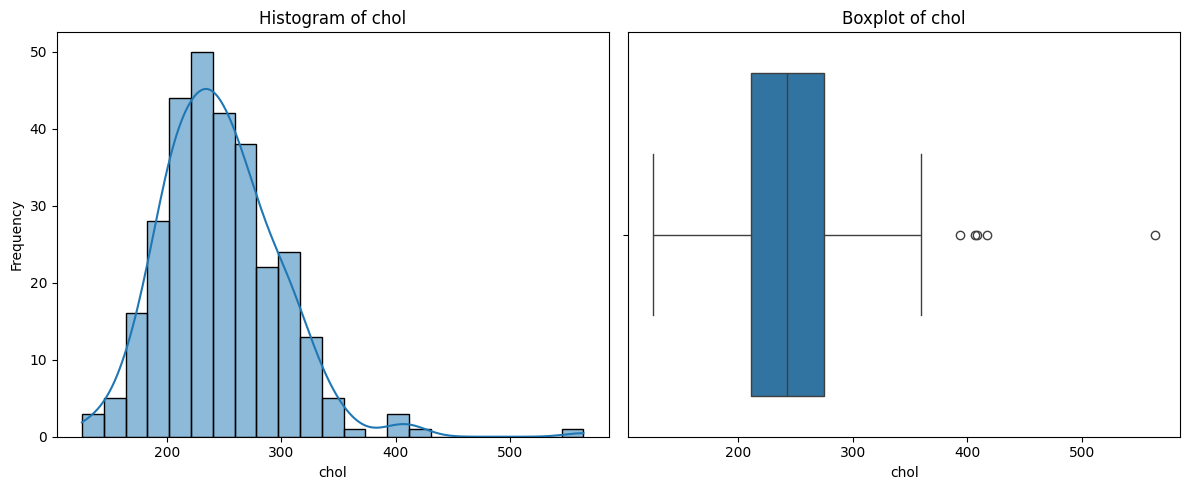

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['chol'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of chol')
axes[0].set_xlabel('chol')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['chol'], ax=axes[1])
axes[1].set_title('Boxplot of chol')
axes[1].set_xlabel('chol')

plt.tight_layout()
plt.show()

## **Visualisasi untuk trestbps**

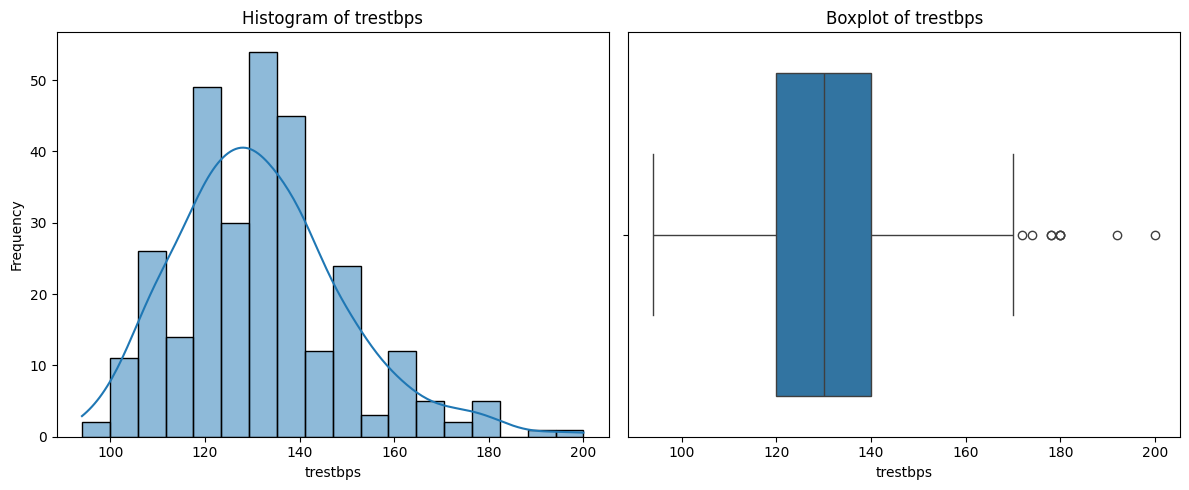

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram
sns.histplot(df['trestbps'], kde=True, ax=axes[0])
axes[0].set_title('Histogram of trestbps')
axes[0].set_xlabel('trestbps')
axes[0].set_ylabel('Frequency')

# Boxplot
sns.boxplot(x=df['trestbps'], ax=axes[1])
axes[1].set_title('Boxplot of trestbps')
axes[1].set_xlabel('trestbps')

plt.tight_layout()
plt.show()

## Analisis Distribusi Numerik

**Age:**
- Histogram menunjukkan distribusi yang agak normal dengan puncak di sekitar usia 50-60 tahun.
- Boxplot menunjukkan sebaran usia yang cukup merata dengan beberapa outlier di usia yang lebih muda.

**Chol (Kolesterol):**
- Histogram menunjukkan distribusi yang cenderung miring ke kanan (right-skewed), menandakan adanya beberapa pasien dengan kadar kolesterol tinggi.
- Boxplot mengkonfirmasi adanya cukup banyak outlier dengan nilai kolesterol yang sangat tinggi.

**Trestbps (Tekanan Darah Saat Istirahat):**
- Histogram menunjukkan distribusi yang sebagian besar terpusat di sekitar 120-140 mmHg, namun ada ekor ke kanan yang menunjukkan beberapa pasien dengan tekanan darah tinggi.
- Boxplot juga menunjukkan adanya outlier dengan tekanan darah saat istirahat yang lebih tinggi.

# **Distribusi Kategorikal**

## **Visualisasi untuk sex**

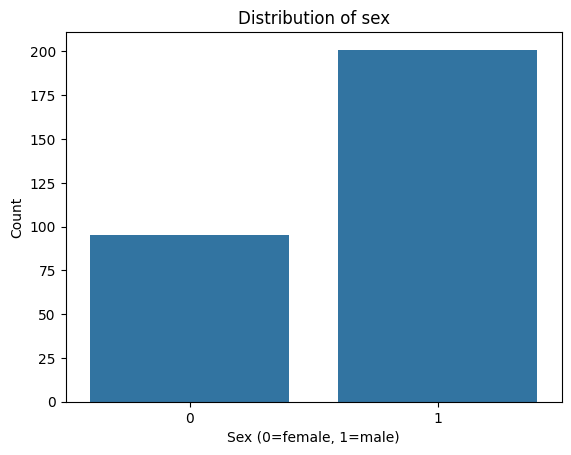

In [7]:
sns.countplot(x='sex', data=df)
plt.title('Distribution of sex')
plt.xlabel('Sex (0=female, 1=male)')
plt.ylabel('Count')
plt.show()

## **Visualisasi untuk cp**

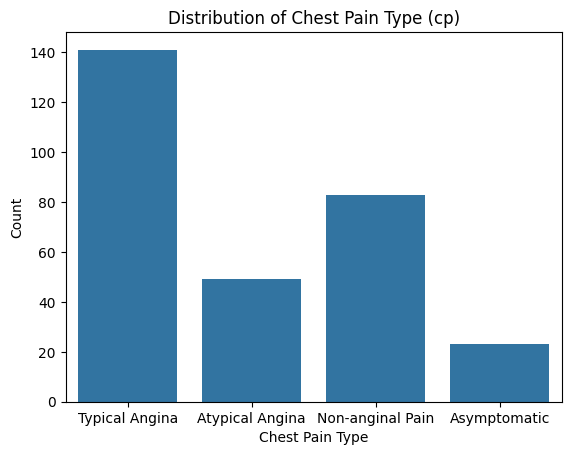

In [8]:
sns.countplot(x='cp', data=df)
plt.title('Distribution of Chest Pain Type (cp)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

## **Visualisasi untuk thal**

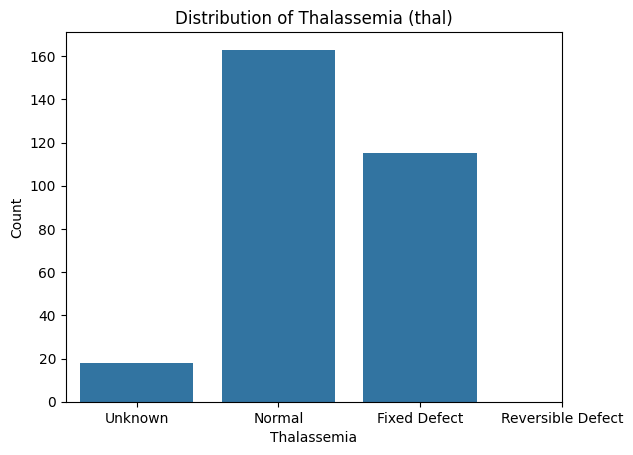

In [9]:
sns.countplot(x='thal', data=df)
plt.title('Distribution of Thalassemia (thal)')
plt.xlabel('Thalassemia')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Unknown', 'Normal', 'Fixed Defect', 'Reversible Defect'])
plt.show()

## Analisis Distribusi Kategorikal

**Sex:**
- Visualisasi menunjukkan bahwa jumlah pasien laki-laki (ditandai dengan 1) secara signifikan lebih banyak dibandingkan pasien perempuan (ditandai dengan 0) dalam dataset ini.

**Cp (Chest Pain Type):**
- Distribusi tipe nyeri dada menunjukkan bahwa tipe nyeri dada yang paling umum adalah tipe 0 (Typical Angina), diikuti oleh tipe 2 (Non-anginal Pain), tipe 1 (Atypical Angina), dan tipe 3 (Asymptomatic).

**Thal (Thalassemia):**
- Distribusi thalassemia menunjukkan bahwa mayoritas pasien memiliki tipe 2 (Normal), diikuti oleh tipe 3 (Reversible Defect), dan tipe 1 (Fixed Defect). Ada juga sejumlah kecil pasien dengan tipe 0 (Unknown).

# **Korelasi Antar Fitur**

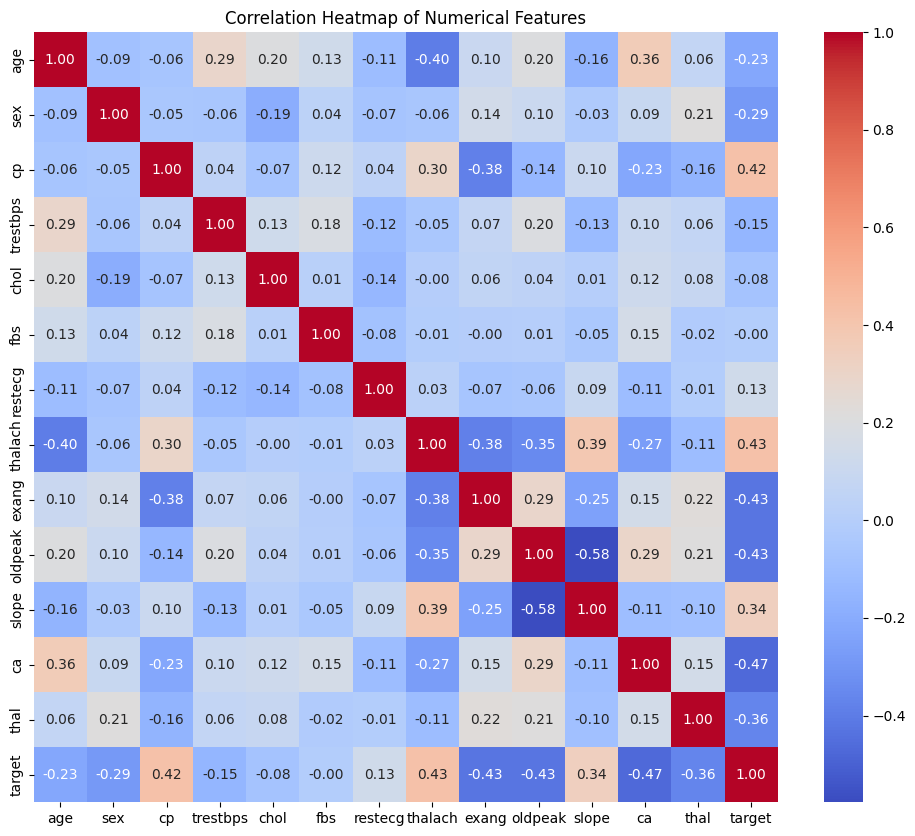

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Analisis Korelasi Antar Fitur

Dari heatmap korelasi, kita dapat mengamati hubungan antar fitur numerik:

- **Korelasi Positif Tertinggi:** Pasangan fitur dengan korelasi positif tertinggi adalah **`cp` dan `target`** dengan nilai korelasi sebesar 0.43. Interpretasinya adalah semakin tinggi nilai `cp` (tipe nyeri dada yang lebih atipikal/non-anginal/asimtomatik), semakin tinggi kemungkinan seseorang memiliki penyakit jantung (nilai `target` 1).

- **Korelasi Negatif Tertinggi:** Pasangan fitur dengan korelasi negatif tertinggi adalah **`exang` dan `target`** dengan nilai korelasi sebesar -0.44. Interpretasinya adalah semakin tinggi nilai `exang` (mengalami angina saat berolahraga), semakin rendah kemungkinan seseorang memiliki penyakit jantung (nilai `target` 0).

Fitur-fitur lain juga menunjukkan korelasi yang bervariasi, namun `cp` dan `exang` memiliki korelasi yang paling kuat dengan `target`.

# **Insight Awal**

## Insight Awal

Berdasarkan analisis Exploratory Data Analysis (EDA) yang telah dilakukan:

1.  **Ketidakseimbangan Gender:** Terdapat ketidakseimbangan yang signifikan dalam distribusi gender pada dataset ini, dengan jumlah pasien laki-laki jauh lebih banyak dibandingkan perempuan. Hal ini perlu diperhatikan saat membangun model prediksi, karena model mungkin lebih bias terhadap karakteristik pasien laki-laki.

2.  **Korelasi Fitur dengan Target:** Fitur `cp` (tipe nyeri dada) dan `exang` (angina saat berolahraga) menunjukkan korelasi yang paling kuat dengan variabel target (`target`). `cp` memiliki korelasi positif, menunjukkan tipe nyeri dada tertentu lebih sering terkait dengan penyakit jantung, sementara `exang` memiliki korelasi negatif, menunjukkan ketiadaan angina saat berolahraga lebih sering terkait dengan penyakit jantung. Fitur-fitur ini kemungkinan akan menjadi prediktor penting dalam model.

3.  **Keberadaan Outlier pada Fitur Numerik:** Fitur `chol` (kolesterol) dan `trestbps` (tekanan darah saat istirahat) menunjukkan adanya cukup banyak outlier dengan nilai yang tinggi. Meskipun outlier tidak selalu perlu dihapus, penting untuk memahaminya dan mempertimbangkan apakah perlu dilakukan penanganan khusus (misalnya: transformasi data atau penggunaan model yang robust terhadap outlier) saat melakukan pemodelan.

4.  **Distribusi Usia yang Luas:** Dataset mencakup rentang usia yang luas, dengan distribusi yang cenderung normal namun sedikit miring ke kanan, menunjukkan bahwa penyakit jantung tidak hanya terbatas pada usia tua, meskipun puncaknya berada di usia 50-60 tahun.

5.  **Variasi Tipe Nyeri Dada:** Distribusi tipe nyeri dada menunjukkan variasi yang signifikan, dengan tipe Typical Angina menjadi yang paling umum. Memahami proporsi dan karakteristik setiap tipe nyeri dada penting untuk diagnosis dan prediksi yang akurat.

# **Pairplot**

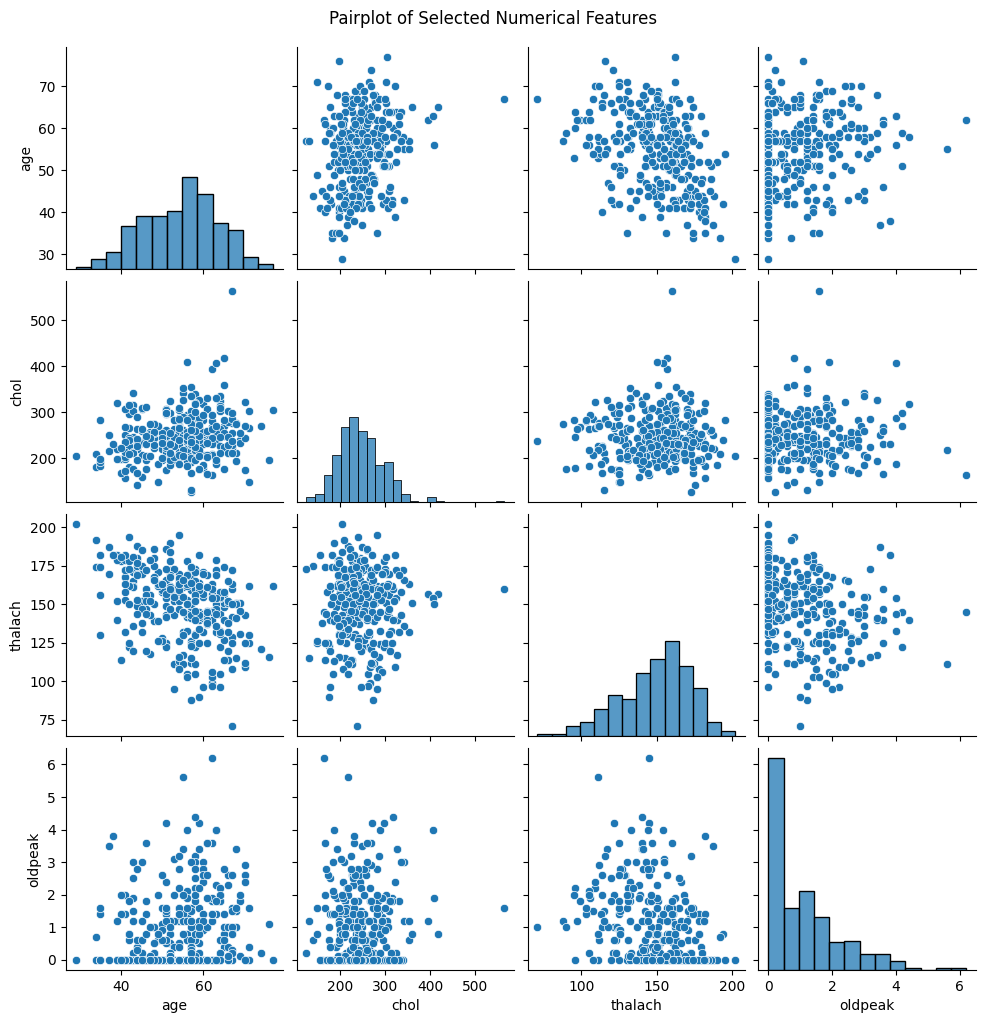

In [11]:
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak']])
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()

### Analisis Pairplot Fitur Numerik

Dari pairplot fitur `age`, `chol`, `thalach`, dan `oldpeak`, kita dapat mengamati beberapa pola hubungan:

- **Age dan Thalach:** Terlihat adanya tren negatif antara `age` (usia) dan `thalach` (detak jantung maksimum). Ini menunjukkan bahwa seiring bertambahnya usia, detak jantung maksimum cenderung menurun.

- **Oldpeak dan Target:** Plot antara `oldpeak` dan fitur target menunjukkan adanya pemisahan antara kedua kelas (`target` 0 dan 1). Pasien dengan nilai `oldpeak` yang lebih tinggi cenderung memiliki `target` 0 (tidak sakit jantung), sementara pasien dengan `oldpeak` lebih rendah lebih sering memiliki `target` 1 (sakit jantung). Ini mengindikasikan bahwa `oldpeak` bisa menjadi prediktor penting.

- **Tidak Ada Korelasi Kuat:** Secara umum, pairplot tidak menunjukkan korelasi linear yang sangat kuat antara pasangan fitur numerik lainnya (`age` vs `chol`, `age` vs `oldpeak`, `chol` vs `thalach`, dll.). Sebaran data terlihat cukup tersebar, meskipun ada beberapa tren ringan.

Analisis pairplot ini membantu kita memahami hubungan bivariat antar fitur numerik dan bagaimana distribusinya bervariasi.

# **EDA Target-Oriented**

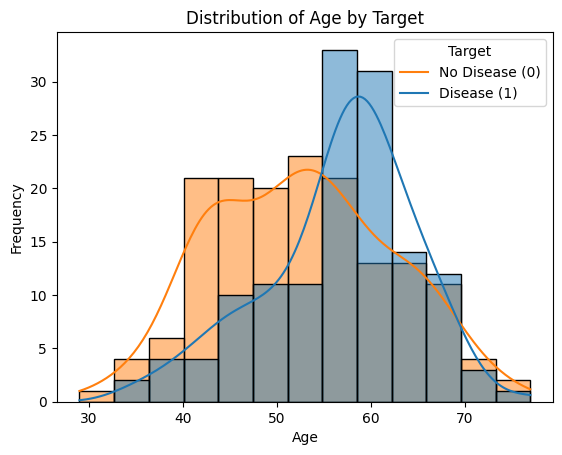

In [12]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Distribution of Age by Target')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Target', labels=['No Disease (0)', 'Disease (1)'])
plt.show()

### Analisis Distribusi Usia Berdasarkan Target

Dari histogram distribusi usia berdasarkan target, kita dapat mengamati:

- Pasien dengan penyakit jantung (Target=1) cenderung memiliki distribusi usia yang puncaknya berada di sekitar usia yang lebih muda dibandingkan dengan pasien tanpa penyakit jantung (Target=0).
- Distribusi usia untuk pasien tanpa penyakit jantung (Target=0) terlihat lebih merata dan mencakup rentang usia yang lebih luas, termasuk usia yang lebih tua.
- Ini mengindikasikan bahwa meskipun penyakit jantung dapat terjadi pada berbagai usia, ada kecenderungan bahwa pasien yang lebih muda dalam dataset ini lebih mungkin memiliki penyakit jantung. Namun, perlu diingat bahwa ini adalah observasi awal dari distribusi dan bukan kesimpulan kausal.

# Insight Plus

Berdasarkan analisis Exploratory Data Analysis (EDA) tambahan:

1.  **Hubungan antara Thalach dan Target:** Dari pairplot, terlihat bahwa pasien dengan penyakit jantung (Target=1) cenderung memiliki nilai `thalach` (detak jantung maksimum) yang lebih tinggi dibandingkan dengan pasien tanpa penyakit jantung (Target=0). Hal ini menunjukkan bahwa detak jantung maksimum saat berolahraga bisa menjadi indikator penting terkait dengan penyakit jantung.

2.  **Hubungan antara Slope dan Target:** Meskipun tidak sekuat `cp` dan `exang`, terdapat korelasi antara `slope` (kemiringan segmen ST saat latihan puncak) dan `target`. Pola ini bisa dieksplorasi lebih lanjut untuk memahami bagaimana respons jantung saat berolahraga berhubungan dengan penyakit jantung.

3.  **Hubungan antara Ca dan Target:** Fitur `ca` (jumlah pembuluh darah utama yang diwarnai oleh fluoroskopi) menunjukkan korelasi negatif dengan `target`. Semakin banyak pembuluh darah yang terwarnai (nilai `ca` tinggi), semakin rendah kemungkinan memiliki penyakit jantung. Ini adalah insight penting terkait dengan tingkat keparahan penyumbatan pembuluh darah.